# Database Management with Python 101
_v1.2_  

In this training we will learn about the tools and code required for connecting to databases and making basic queries using Python. We will also learn about import/ exporting data, and some basic methods to analyse and visualize our data. There are some hands on activities at the end including working with real-world data.

[Module 1: The Tools](#Module-1:-The-Tools)
   - [APIs](#APIs)
   - [Python Libraries](#Python-Libraries)
   - [Notebooks](#Notebooks)
   - [IBM Cloud](#IBM-Cloud)
      - [IBM DB2](#IBM-DB2)
      - [IBM Watson Studio](#IBM-Watson-Studio)

[Module 2: The Code](#Module-2:-The-Code)
   - [Importing APIs and libraries](#Importing-APIs-and-libraries)
   - [Using ibm_db](#Using-ibm_db)
       - [Connecting to the database](#Connecting-to-the-database)
           - [Service credentials](#Service-credentials)
           - [Connection string](#Connection-string)
           - [Establishing a connection](#Establishing-a-connection)
           - [Closing a connection](#Closing-a-connection)
       - [Preparing and executing SQL statemnts in Python](#Preparing-and-executing-SQL-statements-in-Python)
           - [Using .exec_immediate()](#Using-.exec_immediate())
           - [Using .execute()](#Using-.execute()) 
           - [DDL queries](#DDL-queries)
           - [DML queries](#DML-queries)
   - [Fetching results](#Fetching-results)
   - [Using Pandas](#Using-Pandas)
       - [Dataframes](#Dataframes)
           - [Creating dataframes](#Creating-dataframes)
           - [Using dataframe objects](#Using-dataframe-objects)
       - [Importing data](#Importing-data)
           - [Importing data from CSV files](#Importing-data-from-CSV-files)
           - [Importing data from a database](#Importing-data-from-a-database)
       - [Exporting data](#Exporting-data)
           - [Exporting data to CSV files](#Exporting-data-to-CSV-files)
           - [Exporting data to a database](#Exporting-data-to-a-database)
       - [Visualizing data](#Visualizing-data)

[Module 3: Hands-on project](#Module-3:-Hands-on-project)
   - [Activity 1: Set up your environment](#Activity-1:-Set-up-your-environment)
       - [IBM Cloud account creation](#IBM-Cloud-account-creation)
       - [DB2 database creation](#DB2-database-creation)
       - [Obtain your DB2 service credentials](#Obtain-your-DB2-service-credentials)
       - [Set up Watson Studio](#Set-up-Watson-Studio)
       - [Create a notebook](#Create-a-notebook)
       - [Test a database connection](#Test-a-database-connection)  
   - [Activity 2: Use the database](#Activity-2:-Use-the-database)
       - [Add a table to the database](#Add-a-table-to-the-database)
       - [Import data into a dataframe](#Import-data-into-a-dataframe)
       - [Export the dataframe to the database](#Export-the-dataframe-to-the-database)
       - [Experiment with it](#Experiment-with-it)

[Useful links](#Useful-links)

# Module 1: The Tools

## APIs

APIs (Application Programming Interfaces) allow programs to communicate with each other and share data. They work as a mediator between a client and endpoint. 

Here’s how an API works:
1. The client (user) sends a request to the endpoint (another program or server). Details of the request are included in its verb, header, and sometimes a body.
2. When the API receives a valid request it makes a call to the endpoint.
3. The endpoint sends a response back to the API including the requested data.
4. The API passes this data to the client.

Python uses APIs communicating with DBMSs (Database Management System). The standard API for accessing relational databases is called DB API, it works with multiple kinds of RDB and is versatile. Some DBMSs also have their own APIs for allowing Python and other languages to communicate with them. We are using IBM DB2 in this exercise, which has its own API called ibm_db. This is what we will be using.

__[Learn more about ibm_db](https://www.ibm.com/docs/en/db2oc?topic=framework-application-development-db)__

## Python Libraries
With an API and a notebook we already have all we need to connect to the database, but Python on its own is not well-enough equipped to do very advanced work with data. To get the most out of our data, we will need some libraries. Some are similar but they each have their own strengths and weaknesses. There are three categories of useful libraries for data science:

### Scientific computing libraries
__[Pandas](https://pandas.pydata.org)__ - Creates dataframe objects, is used for importing, analyzing, cleaning, exploring, and manipulating data sets.  
__[NumPy](https://numpy.org/)__ - Provides tools for arrays, vertices/ matrices, and linear algebra.  
__[SciPy](https://www.scipy.org/)__ - Scientific computation library based on NumPy used for optimization, stats, and signal processing.  

### Visualization libraries
__[Matplotlib](https://matplotlib.org/)__ - Comprehensive library for creating simple and complex visualizations.  
__[Seaborn](https://seaborn.pydata.org/#)__ - Extension of Matplotlib for simplifying some functionality.  
__[Plotly](https://plotly.com/python/)__ - Creates a range of interactive graphs and charts.  

### Algorithmic libraries
__[Scikit-learn](https://scikit-learn.org/stable/index.html)__ - Used for machine learning with tools for classification, regression, and clustering.  
__[Statsmodels](https://www.statsmodels.org/stable/index.html)__ - Provides classes and functions for estimating statistical models, conducting statistical tests, and statistical data exploration.  

## Notebooks

Notebook interfaces (also called computational notebooks/ digital lab notebooks) are a type programming environment focused on data science, machine learning, and statistics/ analytics. They allow you to quickly run small pieces of code to process data and instantly view results. Notebooks are similar to standard programming IDEs (Integrated Development Environments) but have some key features making them different and particularly useful for data science:
- Interface for running and testing code in blocks rather than a whole program
- Blocks for combining code with markup for other notes without affecting the program
- Simple presentation of results and visualizations
- Good for collaborating on or sharing work

We will be using Jupyter Notebooks through the IBM Watson Studio interface.

__[Learn more about Notebooks](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/notebooks-parent.html)__

## IBM Cloud
This is the platform we will be using to host our cloud database and notebooks. IBM Cloud has many products available including IBM DB2 and IBM Watson Studio both of which we will be using. Making an account is simple and free and will be covered in a later module.

The main screen is the dashboard, this is what the top of it looks like:
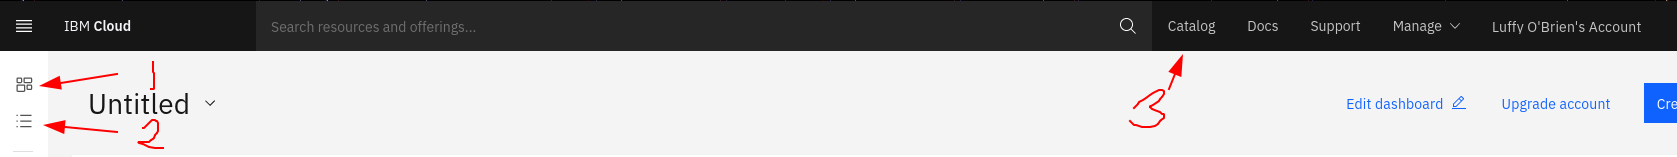
The three main things which you will need labeled:
1. Return to the dashboard
2. View resources used by your account
3. Catalog to get new resources

__[Learn more about IBM Cloud](https://www.ibm.com/cloud)__

### IBM DB2
DB2 is IBM's DBMS, it can be used for free and is cloud-based which is both very useful and secure.

### IBM Watson Studio
IBM Watson Studio is a package for AI and machine learning, but it comes with a built-in easy to use editor for Jupyter and is the easiest way to quickly get started using notebooks to integrate Python with a database.


# Module 2: The Code

## Importing APIs and libraries
To use functionality from a library which isn't built in to Python, it needs to be installed and then imported, which is super simple. Usually a library will be imported with an alias (as pd) so referring to it is faster and keeps code cleaner.

ibm_db  
``` python
import ibm_db
```
Pandas  
``` python
import pandas as pd
```
NumPy  
``` python
import numpy as np
```
If the library has not been installed yet, it may output an error like this:  
> modulenotfounderror: No module named 'ibm_db'

That means the module has not been installed. Use the Python package manager (pip) commands in the terminal or at the top of the code to install it.  
``` python
!pip install ibm_db
```
If you don't know the name of a package, you can find it on __[pypi.org](https://pypi.org/)__.

## Using ibm_db
### Connecting to the database
Connections to a DB2 database are established via the ibm_db API using the `.connect()` method with a list of service credentials hardcoded directly into the first parameter. In a single line, it would look like this:
``` python
ibm_db.connect("DATABASE=name;HOSTNAME=host;PORT=60000;PROTOCOL=TCPIP;UID=username;PWD=password;", "", "") 
```
While this is short it's not best practice, so we break it down neatly into steps and understand better what's going on.

#### Service credentials
For the API to find the database, securely connect to it, and have permission to view or interact with data, service credentials are required. We will store them as variables and build them into a connection string. You will learn how to get the blank ones later.

``` python
dsn_hostname = ""
dsn_uid = ""
dsn_pwd = ""
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"
dsn_port = ""
dsn_protocol = "TCPIP"
dsn_security = "SSL"
```

#### Connection string
This builds a connection string called dsn out of the service credentials.
``` python
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)
```

#### Establishing a connection
Now we're ready to establish a connection to the database, passing in the connection string as an argument. 
We will also create the connection as an object to easily refer to it later. Usually this is called "connection" or "conn".  
``` python
conn = ibm_db.connect(dsn, "", "")
``` 
This is all you need to connect, but usually it's good to use some error handling and have it print the results to be sure that all is working correctly.  
``` python
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )
```

#### Closing a connection
Connections do not close themselves so they should never be left open after their purpose is accomplished. When you're finished using a connection, always remember to close it with the `.close()` method.
``` python
ibm_db.close(conn)
```

__[Learn more about connecting to a DB2 server](https://www.ibm.com/docs/en/db2oc?topic=db-connecting-database-server)__

### Preparing and executing SQL statements in Python
There are two ways to execute SQL statements in Python:
- `.exec_immediate()`
- `.prepare()`, `.bind_param()`, `.execute()`

To execute a single SQL statement, you can use the ibm_db method `.exec_immediate()`. It is useful for quickly and easily executing pure SQL statements.
<div class="alert alert-block alert-warning"><b>Note: </b>Do not use variable strings with .exec_immediate() because inclusion of Python variables exposes vulnerability to SQL injection, so use static strings only. To include variables, use the other method.</div>

To prepare and execute SQL statements with variable input use the `.prepare()`, `.bind_param()`, `.execute()` methods. Preparing statements before executing them also improves performance if the statements will be executed multiple times.

If any function calls fail (returns False), you can use `.stmt_error()` or `.stmt_errormsg()` to get more information about the error.

**Helpful tip**: Queries can get long and sometimes you'll want to split them across multiple lines for readability. Use a forward slash (\\) at the end of each line of SQL to tell Python to carry over to the next line.
``` python
createQry = "CREATE TABLE mytable(\
                first_column INT PRIMARY KEY NOT NULL,\
                second_column VARCHAR(50),\
                )"
```

#### Using .exec_immediate()

This method takes three arguments: 
- connection - The db connection resource returned from ibm_db.connect().
- statement - The SQL statement. This string can include an XQuery expression.
- options - Optional parameter for requesting different types of cursor.

SQL statements are usually constructed as an object called 'stmt'. Here is an example. It's also good practice to pass in the SQL statement argument as a string rather than writing it in directly.

``` python
sql = "SELECT * FROM mytable"
stmt = ibm_db.exec_immediate(conn, sql)
```
__[Learn more about .exec_immediate()](https://www.ibm.com/docs/en/db2oc?topic=statements-preparing-executing-single-sql-statement)__

#### Using .execute()
There are three steps involved with this method.

##### ibm_db.prepare()
Pass in the following arguments, they are mostly the same as for `.exec_immediate()`.
- connection - The db connection resource returned from ibm_db.connect().
- statement - The SQL statement. This string can include an XQuery expression. Mark column or predicate values which require variable input with question marks (?).
- options - Optional parameter for requesting different types of cursor.
``` python
sql = "SELECT * FROM mytable WHERE ? > ?"
stmt = ibm_db.prepare(conn, sql)
```

##### ibm_db.bind_param()
If you included parameter markers (?) for variables in the SQL statement, this step binds a value to them. If you did not use any, you can skip this step. For each parameter marker in the SQL string, call this function, passing the listed arguments.
- stmt - The prepared statement which was returned by .prepare().
- parameter-number - An integer representing the position of the parameter marker (?) in the SQL statement.
- variable - The value to use in place of the parameter marker.
Binding input values to parameter markers ensures that each input value is treated as a single parameter, which prevents SQL injection attacks.

``` python
var_a = "mycolumn"
var_b = 20
ibm_db.bind_param(stmt, 1, var_a)
ibm_db.bind_param(stmt, 2, var_b)

```

##### ibm_db.execute()
Finally, execute the statement.
- stmt - The prepared statement.
- parameters - A tuple of input parameters that match parameter markers that are contained in the prepared statement. 

``` python
ibm_db.execute(stmt)
```
All together the whole process looks like this:

``` python
var_a = "mycolumn"
var_b = 20

sql = "SELECT * FROM mytable WHERE ? > ?"

stmt = ibm_db.prepare(conn, sql)
ibm_db.bind_param(stmt, 1, var_a)
ibm_db.bind_param(stmt, 2, var_b)
ibm_db.execute(stmt)
```

##### Reusing it
Because the statement is already prepared, you can invoke it again using dynamically bound parameters.

``` python
param = var_a, var_b, 
ibm_db.execute(stmt, param)
```
Now that you know how to use `.exec_immediate()` and `.execute()`, it's easy to insert any queries you wish to use in there.

__[Learn more about .execute()](https://www.ibm.com/docs/en/db2oc?topic=statements-preparing-executing-sql-variable-input)__

#### DDL queries
DDL = Database Definition Language refers to the parts of SQL which can be used to manipulate the structure of a database and its tables.

##### Creating tables
``` python
createQuery = "CREATE TABLE planets(id INTEGER PRIMARY KEY NOT NULL, name VARCHAR(5))"
createStmt = ibm_db.exec_immediate(conn, createQuery)
```
##### Dropping tables
``` python
dropQuery = "DROP TABLE planets"
dropStmt = ibm_db.exec_immediate(conn, dropQuery)
```
##### Changing tables
``` python
alterQuery = "ALTER TABLE planets ALTER COLUMN name SET DATA TYPE VARCHAR(10)"
alterStmt = ibm_db.exec_immediate(conn, alterQuery)
```
__[Learn more about DDL](https://www.ibm.com/docs/en/i/7.3?topic=programming-data-definition-language)__

#### DML queries
DML = Database Manipulation Language refers to the parts of SQL which can be used to read and write data.

##### Querying data
``` python
selectQuery = "SELECT * FROM mytable"
selectStmt = ibm_db.exec_immediate(conn, selectQuery)
```
##### Inserting data
``` python
insertQuery = "INSERT INTO mytable VALUES (‘hello', ‘world’)"
insertStmt = ibm_db.exec_immediate(conn, insertQuery)
```
##### Updating data
``` python
updateQuery = "UPDATE mytable SET foo='goodbye' WHERE bar='world'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)
```
__[Learn more about DML](https://www.ibm.com/docs/en/i/7.3?topic=programming-data-manipulation-language)__

### Fetching results
When you execute a query which returns a set of results, you can iterate through the returned rows or columns using fetch methods.
- .fetch_tuple() - Returns a tuple, which is indexed by column position, representing a row in a result set. The columns are 0-indexed.
- .fetch_assoc() - Returns a dictionary, which is indexed by column name, representing a row in a result set.
- .fetch_both() - Returns a dictionary, which is indexed by both column name and position, representing a row in a result set.
- .fetch_row() - Sets the result set pointer to the next row or requested row. Use this function to iterate through a result set.

These methods use the following parameters:
- stmt - A valid statement resource.
- row_number - Optional. The number of the row that you want to retrieve from the result set. This is used if you specified a different cursor when you used .exec_immediate() or .prepare().

So to finish the sqlect query from earlier and actually receive the results, it would look like this.
``` python
selectQuery = "SELECT * FROM mytable"
selectStmt = ibm_db.exec_immediate(conn, selectQuery)
ibm_db.fetch_both(selectStmt)
```
__[Learn more about fetching](https://www.ibm.com/docs/en/db2oc?topic=db-fetching-rows-columns-from-result-sets)__

## Using Pandas
Pandas is a Python library which contains high level data structures and manipulation tools designed to make data analysis fast and easy in Python. Some of its key features are the use of dataframes and simplicity of importing/ exporting data between files, dataframes, and databases.

### Dataframes
Dataframes are 2-dimensional structures which work similarly to lists and dictionaries but are more advanced and can easily function as a database table within Python.

#### Creating dataframes
Creating a dataframe is simple, it is created any time data is read, and is usually stored as an object called df.

``` python
mydata = {
  'foo': ["b", "a", "r"],
  'abc': [1, 2, 3]
}

df = pd.DataFrame(mydata)
```
This is what the dataframe df would look like:

|    |foo |abc |
|----|----|----|
|0   |b   |1   |
|1   |a   |2   |
|2   |r   |3   |

#### Using dataframe objects
Dataframe objects have many extremely useful objects for quickly returning all sorts of information about them and their contents. Here are a few common ones:  
- See how many rows and columns are in the dataframe  
`df.shape()`  
Returns a tuple with the number of rows and of columns  
- See how many elements are contained  
`df.size()`  
Returns an int with the total number of elements  
- View summary of all data  
`df.describe()`  
Returns a detailed table including the count, mean, minimum value, and maximum value of all numeric values by each column. Can also be filtered to return a single column.  
`df['ColumnName'].describe()` 
- Summarize categorical data into groups of discrete values.  
`df['ColumnName'].value_counts().to_frame()`  
- View first n rows (default = 5)  
`df.head()`  
- View last n rows (default = 5)  
`df.tail()` 
- Return index number of record with highest value in a column  
`df.idmax()`  
- Return values of a record by reference  
`df.at[index,’<ColumnName>’]`  
- Group the results of a dataframe  
Group the data by one or more columns for groups or subgroups. Use .mean to show only the average for each subgroup.  
`df.groupby([‘col1’, ‘col2’], as_index=False).mean()`  

__[Learn more about dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)__

### Importing data
Pandas can import data from many sources including:
- CSV
- Dataframe
- EXCEL
- JSON
- HTML
- SQL
- XML

We will learn how to use CSV and SQL.

#### Importing data from CSV files
`.read_csv()` has many parameters but the only required argument is the first one which is the filepath of the file being read. Other parameters give the options to use different delimiters from spaces, define which line the header row is in, change header names for the output, or to define the data type of the columns.
``` python
df = pd.read_csv('filepath/data.csv') 
```

#### Importing data from a database
The process is similar to querying a database with ibm_db and uses the `.read_sql()` method
1. Create a connection for pandas
2. Construct a query statement
3. Retrieve the query results into a pandas dataframe

``` python
pconn = ibm_db_dbi.Connection(conn)
selectQuery = "select * from INSTRUCTOR"
df = pd.read_sql(selectQuery, pconn)
```

### Exporting data
Exporting data is mostly the same as importing it.

#### Exporting data to CSV files
This is simple and straightforward, again there are many parameters but we only need the first one, to set the filename and path of the output. 
``` python
df.to_csv('filepath/data.csv', index=False) 
```
By default Pandas will include the row indexes as a column, so `index=False` can be used as a second argument to disable that.

#### Exporting data to a database
The process is similar to querying a database with ibm_db and is done with the method `.to_sql()`.
The most important parameters are:  
- name: str  
Name of SQL table.  
- con: connection object  
Connection object used to interract with the database  
- if_exists: {‘fail’, ‘replace’, ‘append’}, default ‘fail’  
How to behave if the table already exists.  
   - fail: Raise a ValueError.  
   - replace: Drop the table before inserting new values.  
   - append: Insert new values to the existing table.  
- index: bool, default True  
Write DataFrame index as a column. Uses index_label as the column name in the table.  

There are other parameters which are either optional or have defaults if not used.  

``` python
df.to_sql('mytable', conn, if_exists='append', index = False)
```

__[Learn more about importing and exporting data](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)__

### Visualizing data
Using libraries like matplotlib and seaborn gives a lot of options in how to plot data to a graph or chart. The syntax for each one is pretty different but they are mostly self explanatory so it's usually best to just figure out or check the documentation. As with everything else, while a plot can be made simply with a method like `.boxplot()`, it's better to create it as an objectso you can more easily reference and modify the plot after instantiation.

Remember to import your libraries.
``` python
import matplotlib.pyplot as plt
import seaborn as sns
```

#### .swarmplot()
``` python
plot = sns.swarmplot(x=’<ColumnName>’, y=’<ColumnName>’, data=dataframe)
plot.setp(plot.get_xticklabels(), rotation=70)
plot.title(‘sodium content’)
plot.show()
```

#### .joinplot()
``` python
plot = sns.joinplot(x=’<ColumnName>’, y=’<ColumnName>’, data=dataframe)
plot.show()
```

#### .boxplot()
``` python
plot = sns.boxplot(x= “<column1>”, y= “<column2>”, data=df)
plot.show()
```

__[Learn more about data visualization](https://matplotlib.org/stable/tutorials/index.html)__

# Module 3: Hands-on project

Now we will work on a simple project using real-world data to try out everything covered in this training.

Our project will be analyzing data from NASA CNEOS (Center of Near Earth Object Studies) about fireballs and bolides, because space is awesome and so is anything involving the word "fireball".
The data can be found here: https://cneos.jpl.nasa.gov/fireballs/. Scroll down to the table and download it as a CSV called "cneos_fireball_data.csv".

Hints and example code with solutions are included but hidden by default. Try to figure out all the coding tasks on your own first but if you get stuck, have a look at the hints. If you still really don't know what to do, press the button to reveal a code block with a solution for that task. There's often more than one way to make things work though, and not all solutions might be the best way so go ahead and experiment to see if you can figure out a better way to do it!

Here are some useful notes:
- Libraries only need to be imported once per notebook, not for each code cell/ task. All you need is just one cell with all your imports and dependencies right at the top of the notebook. Any time you need an extra library, just add it to the list and re-run that cell.
- Avoid putting all your code into one cell and don't limit yourself to using just one cell for each task. Most of the time it's best to split your code up into smaller blocks which make sense and using a separate cell for each one. This will make life easier and keep your code more efficient and re-usable.
- Variables are stored in the kernel so they are remembered and carry over between cells.
- If you want to start over the option is in the menu: Kernel -> Restart & Clear Output.

## Activity 1- Set up your environment

Before being able to do anything, we need an environment to work in. This module covers the steps for setting up a database and notebook and testing them.

### IBM Cloud account creation

1. Go to the website: www.ibm.com/cloud/free.
1. Click "Create your free account".
1. Create your account. This will require an email address and some basic information.

### DB2 database creation
1. Go to the catalog from your dashboard and search "db2".
1. Set "London" as your location. 
1. Select the Lite (Free) plan.
1. Agree to the license agreements.
1. Click "Create". Your database will be ready to use in a few minutes.
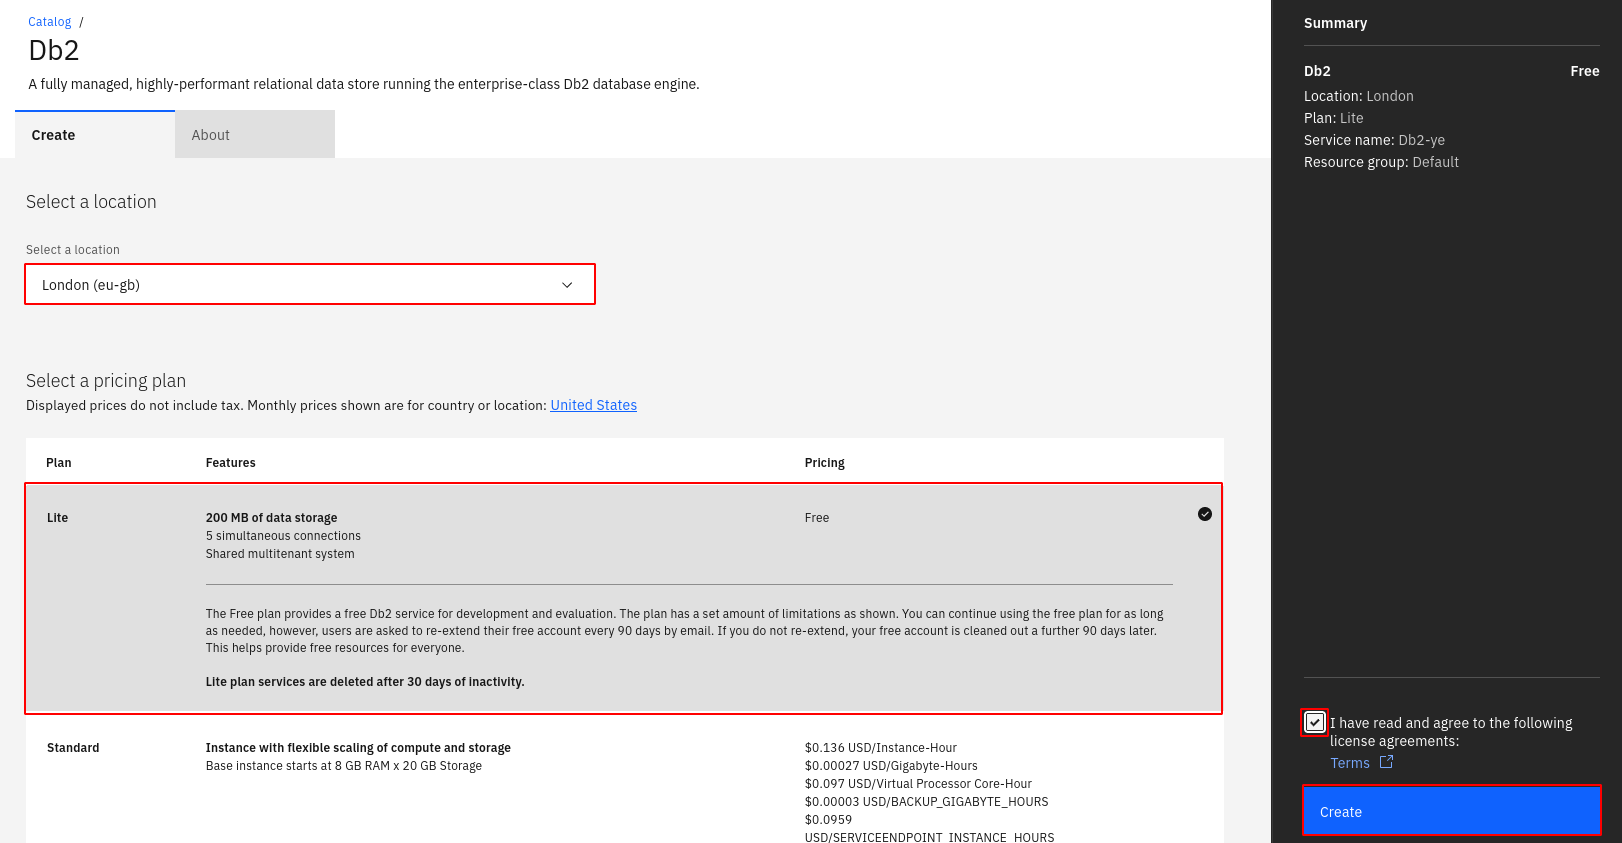

### Obtain your DB2 service credentials
In the Resource list under "Services and software" you'll find your database. Select it then click "View full details".  
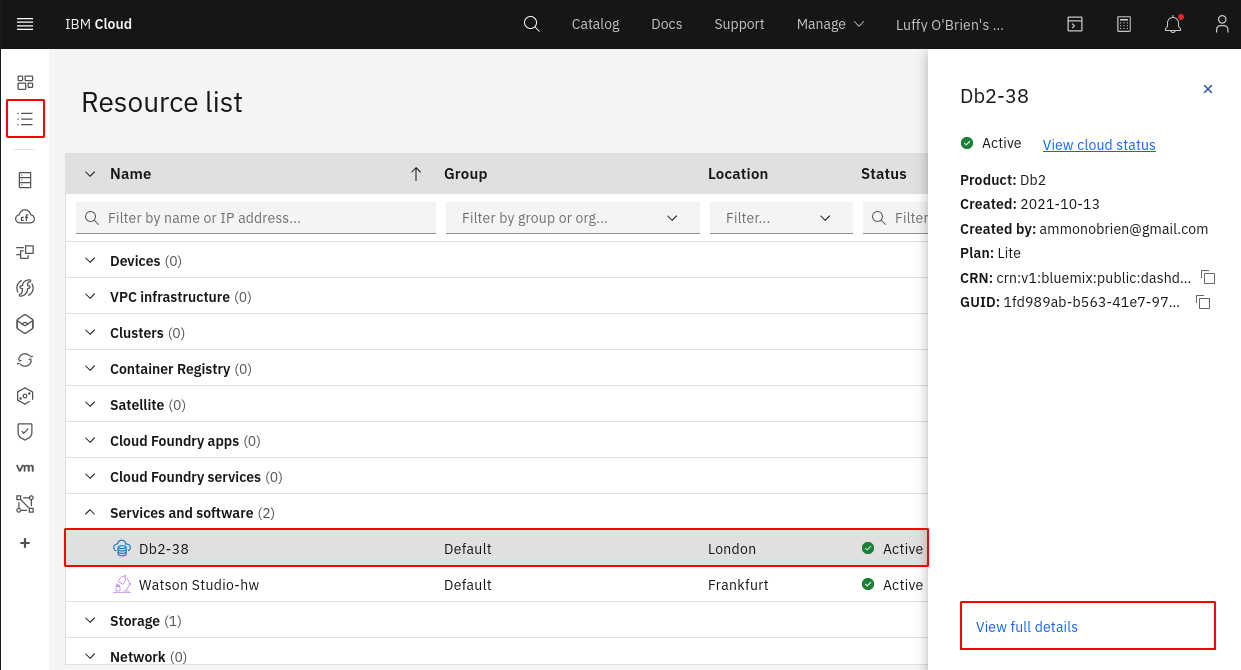

On the details page select "Service credentials" from the menu and then create a new credential. In there you will find the connection details required for connecting to your own database, note them down somewhere because you'll need them soon. Always keep them secret, never share them.  
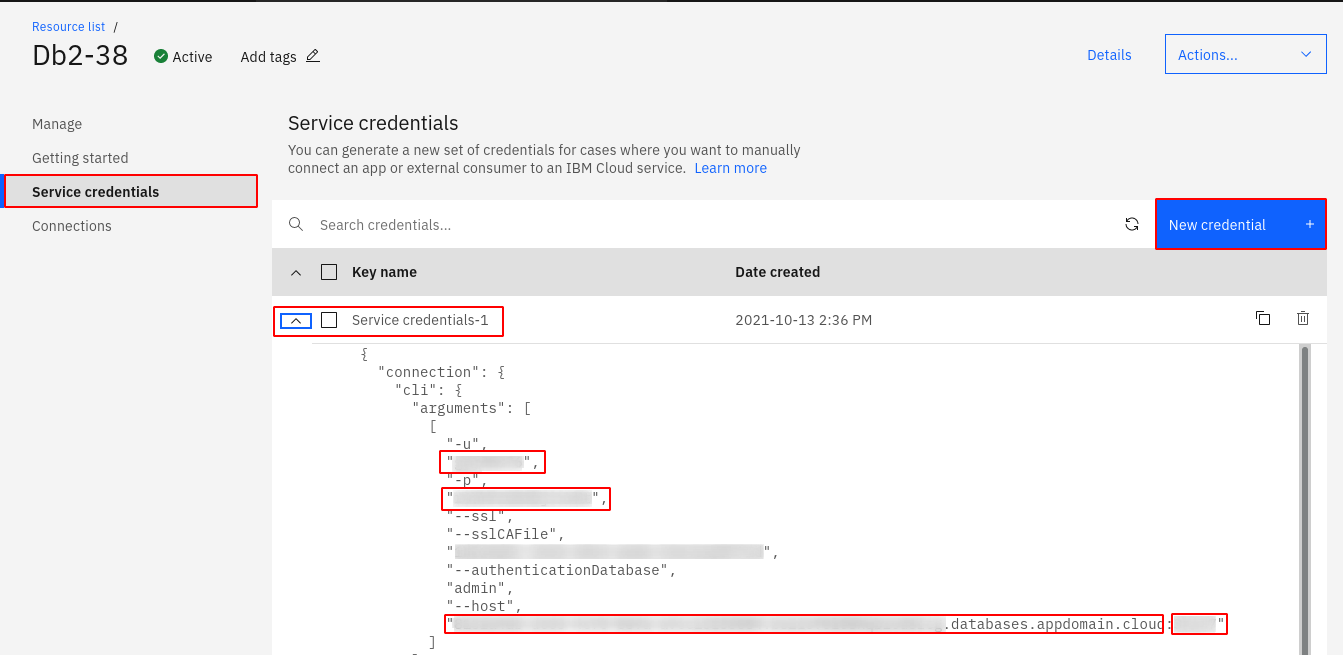

### Set up Watson Studio
The process for this is the same as for DB2. This time the location doesn't matter. Note that you can only have one instance of Watson Studio.  
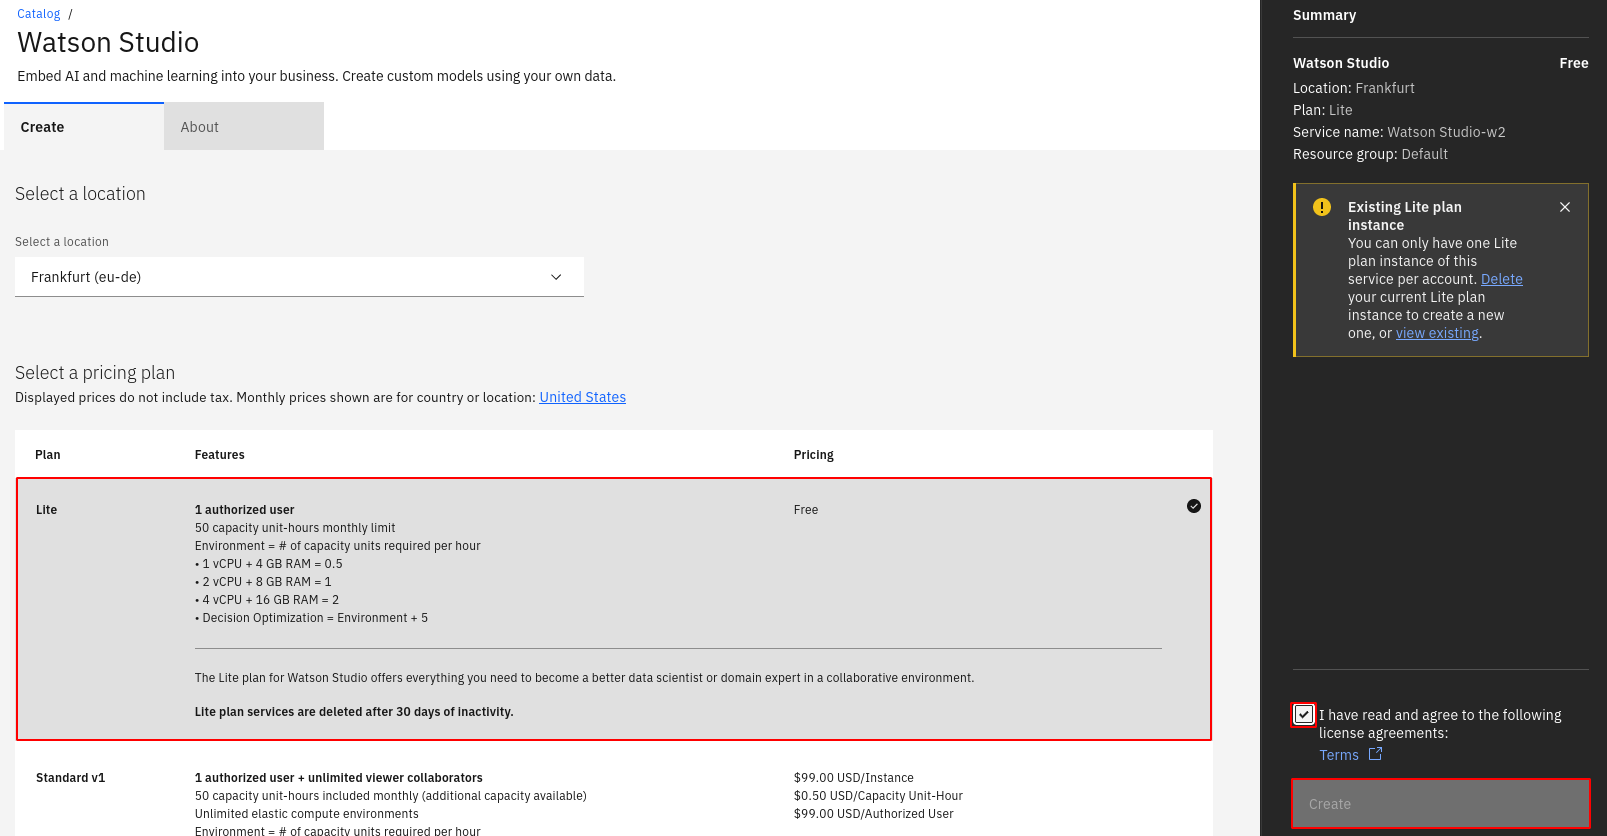

### Create a notebook
Click on create a project and select "Create an empty project".
You'll need to name it and add some storage, select "Cloud Object Storage-he" for the storage then click "Create".
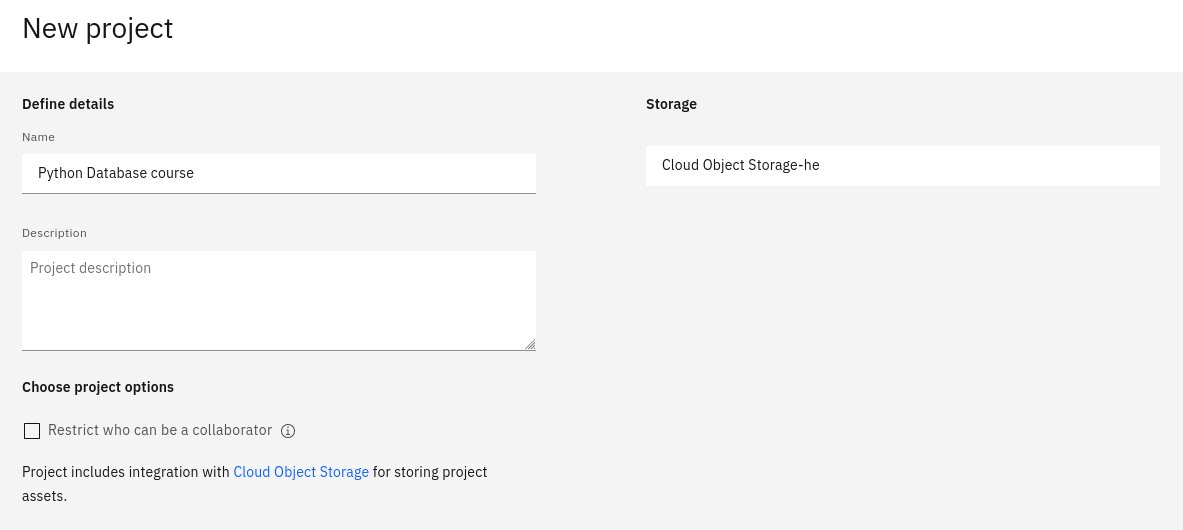

In your project, click "Add" to project at the top and select "Notebook". Then select "Blank", name your notebook and click "Create".
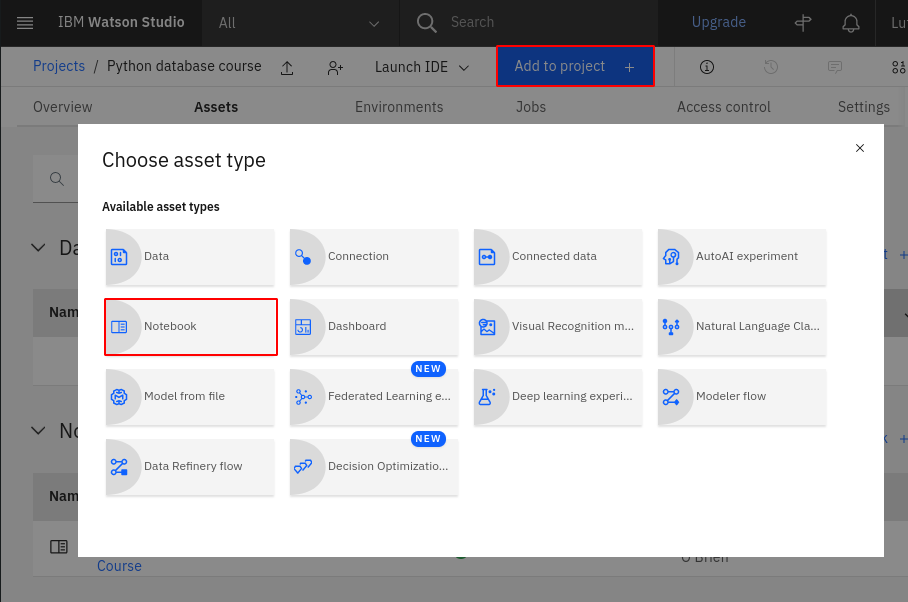

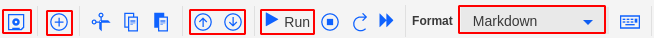

Content in notebooks is divided cells. In the menu you can switch the cell format between markdown and code. Markdown cells look like this one and can hold formatted notes and information. Code cells can be run, and the output will appear below them.

- To create a new cell press the + in a circle.  
- To edit a cell double click on it.
- To move a cell up and down press the up and down arrows in circles.
- To stop editing a markdown cell press Run in the menu, or Shift + Enter.
- To run a single code cell press Run in the menu, or Shift + Enter.
- To run all cells press Ctrl + Enter.
- To save your notebook press the floppy drive icon.

<div class="alert alert-block alert-warning"><b>Note: </b>From this point forwards there will be hands-on activities, so read this guide directly in the notebook rather than in HTML format.</div>

### Test a database connection

Everything you need is in Module 2. Don't forget to add your own service credentials, it should look something like this:

``` python
dsn_hostname = "abc123abc-abc1-abc1-abc1-abc123abc123.abcabc.databases.appdomain.cloud"  
dsn_uid = "abc12345"  
dsn_pwd = "abc123abc123abc123"  

dsn_port = "30333"
```
This connection is a quick test so also include the code to close it right away too.  
When you're ready, press Shift + Enter to run the code cell. You'll see the output below it with feedback to confirm if things went well, or an error if something was incorrect.

<details>
<summary>Need a hint? **Click here**.</summary>
    
Here are the steps:  
- Import the Python library<br>  
- Identify the db connection credentials<br>  
- Create the connection string<br>  
- Create database connection<br>  
- Close the connection<br>  
    
</details>

If you're still stuck, have a look at the solution.
<button class="btnToggleCode-m">Show solution</button>

Once you're able to open and close a connection to the database, you're ready to move on!

In [ ]:
#Import the Python library   
import ibm_db   

#Identify the db connection credentials  
dsn_hostname = ""  
dsn_uid = ""   
dsn_pwd = ""  

dsn_driver = "{IBM DB2 ODBC DRIVER}"  
dsn_database = "BLUDB"  
dsn_port = ""  
dsn_protocol = "TCPIP"  
dsn_security = "SSL"  

#Create the connection string  
dsn = (  
    "DRIVER={0};"  
    "DATABASE={1};"  
    "HOSTNAME={2};"  
    "PORT={3};"  
    "PROTOCOL={4};"  
    "UID={5};"  
    "PWD={6};"  
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security) 
    
#Create database connection  
try:  
    conn = ibm_db.connect(dsn, "", "")  
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)  

except:  
    print ("Unable to connect: ", ibm_db.conn_errormsg() )  

#Close the connection  
ibm_db.close(conn)  

## Activity 2: Use the database

With an environment set up and a connection tested, now we can get to the main project.

### Add a table to the database
Create a table on the database called "fireball_and_bolide_data".  
You can refer to the website for the data source to know what the names and data types for each column.  
Note: Pay attention to the data types, especially which date and numeric formats you should use.  
[Learn more about data types](https://www.ibm.com/docs/en/db2-for-zos/11?topic=elements-data-types)

<details>
<summary>Need a hint? **Click here**.</summary>
    
- Use ibm_db.exec_immediate() to pass your SQL queries through the API. 
- Table creation is done with DDL type statements.
    
</details>

If you're still stuck, have a look at the solution.
<button class="btnToggleCode-m">Show solution</button>

In [2]:
#Import the Python library
import ibm_db

#Identify the db connection credentials
dsn_hostname = "815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud"
dsn_uid = "gjd38176"
dsn_pwd = "r60hPrG8JBjitoNt"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"
dsn_port = "30367"
dsn_protocol = "TCPIP"
dsn_security = "SSL"

#Create the connection string
dsn = (
"DRIVER={0};"
"DATABASE={1};"
"HOSTNAME={2};"
"PORT={3};"
"PROTOCOL={4};"
"UID={5};"
"PWD={6};"
"SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#Create database connection
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() ) 

Connected to database:  BLUDB as user:  gjd38176 on host:  815fa4db-dc03-4c70-869a-a9cc13f33084.bs2io90l08kqb1od8lcg.databases.appdomain.cloud


In [3]:
dropQry = "DROP TABLE fireball_and_bolide_data"
dropStmt = ibm_db.exec_immediate(conn, dropQry)

Exception: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "GJD38176.FIREBALL_AND_BOLIDE_DATA" is an undefined name.  SQLSTATE=42704 SQLCODE=-204

In [6]:
createQry = "CREATE TABLE fireball_and_bolide_data(\
                peak_brightness_datetime_UT TIMESTAMP PRIMARY KEY NOT NULL,\
                latitude_deg VARCHAR(5),\
                longitude_deg VARCHAR(5),\
                altitude_km REAL,\
                velocity_kms REAL,\
                velocityComponents_kms_vx REAL,\
                velocityComponents_kms_vy REAL,\
                velocityComponents_kms_vz REAL,\
                totalRadiatedEnergy_j VARCHAR(10),\
                calculatedTotalImpaceEnergy_kt DOUBLE\
                )"
createStmt = ibm_db.exec_immediate(conn, createQry)

In [5]:
testQry = "SELECT * FROM fireball_and_bolide_data"
testStmt = ibm_db.exec_immediate(conn, testQry)

In [7]:
ibm_db.close(conn) ;

### Import data into a dataframe

Import the data from cneos_fireball_data.csv and store it in a dataframe.

<details>
<summary>Need a hint? **Click here**.</summary>
    
- Pandas.read_csv() is the method for importing data from a CSV file.
- Pay attention to the headers 
    
</details>

If you're still stuck, have a look at the solution.
<button class="btnToggleCode-m">Show solution</button>

### Export the dataframe to the database
You'll need to use `.to_sql()` for this. Pay attention to the additional parameters for instance to correctly handle the headings and index.

<details>
<summary>Need a hint? **Click here**.</summary>
    
- Use ibm_db.exec_immediate() to pass your SQL queries through the API. 
- Table creation is done with DDL type statements.
    
</details>

If you're still stuck, have a look at the solution.
<button class="btnToggleCode-m">Show solution</button>

### Experiment with it

Try to query the data and store the results in a dataframe then plot that data to some graphs.  

Now you're basically a pro. Enjoy!

# Useful links

[Top of page](#Basics-of-Databases-with-Python)

Recommended courses for learning these subjects in detail:  
[IBM PY0101EN - Python Basics for Data Science](https://www.edx.org/course/python-basics-for-data-science)  
[IBM DB0201EN - SQL for Data Science](https://www.edx.org/course/sql-for-data-science)  